<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Event-Recommendation-Engine-Challenge" data-toc-modified-id="Event-Recommendation-Engine-Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Event Recommendation Engine Challenge</a></span></li><li><span><a href="#数据说明" data-toc-modified-id="数据说明-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据说明</a></span></li><li><span><a href="#工具包" data-toc-modified-id="工具包-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>工具包</a></span></li><li><span><a href="#数据与信息" data-toc-modified-id="数据与信息-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>数据与信息</a></span></li><li><span><a href="#取出events" data-toc-modified-id="取出events-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>取出events</a></span></li><li><span><a href="#聚类" data-toc-modified-id="聚类-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>聚类</a></span></li><li><span><a href="#总结分析" data-toc-modified-id="总结分析-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>总结分析</a></span></li></ul></div>

# Event Recommendation Engine Challenge

# 数据说明
共有六个文件：train.csv，test.csv， users.csv，user_friends.csv，events.csv和 event_attendees.csv。

**train.csv**  有六列：用户(user)，事件(event)，邀请(invited)，时间戳(timestamp)，感兴趣(interested)和不感兴趣(not_interested)。 
**Test.csv**  包含与train.csv相同的列，没有感兴趣和不感兴趣。  
在我们的应用程序中, 每一行的事件()与用户()是一一对应的。  
**event**  是标识我们系统中的事件的标识。  
**user**  是代表我们系统中的用户的ID。  
**invited**  是一个二进制变量，表示用户是否被邀请参加该活动。      
**timestamp** 是一个ISO-8601 UTC时间字符串，表示当用户在我们的应用程序中看到事件时的大致时间（+/- 2小时）。     
**interested**  是一个二进制变量，用于指示用户是否单击此事件的“感兴趣”按钮; 如果用户点击兴趣，则为1，如果用户没有点击该按钮，则为0。    
**not_interested**  是也一个二进制变量，指示用户是否单击此事件的“不感兴趣”按钮; 如果用户点击该按钮则为1，否则为0。    
有一种可能是用户看到的事件，既不点击 感兴趣，也不点击无兴趣，因此存在 感兴趣，不感兴趣都是0的可能。

users.csv包含我们的一些用户（包括出现在训练集和测试集文件中的所有用户）的人口统计数据，它包含以下列：  user_id，  locale，  birthyear，  gender，  joinedAt，  位置(location)和  时区(timezone)。 
user_id是我们系统中用户的ID。  
locale(环境)是一个表示用户使用环境的字符串，它的格式是 language(语言)_ territory(区域)。
birthyear(出生年份)是代表用户出生年份的4位整数。 
gender(性别)是男性还是女性，取决于用户的性别。  
joinedAt(加入时间)是一个ISO-8601 UTC时间字符串，表示用户第一次使用我们的应用程序的时间。  
location(位置)  是表示用户位置的字符串（如果知道）。
timezone(时区)是一个有符号整数，表示用户的UTC偏移量（以分钟为单位）。

user_friends.csv包含有关此用户的社交数据，并包含两列：user(用户)和friends(朋友)。  
用户是我们系统中的用户ID， 朋友是用户朋友ID的空格分隔列表。

events.csv  包含有关我们系统中事件的数据，共有110列。前九栏是  event_id，user_id，start_time，city，state，zip，country， lat和lng。 
event_id是事件的ID，
user_id  是创建这个事件的用户的ID。  
city(城市)，state(州)，zip(邮政编码)和country(国家)代表关于场地位置的更多细节（如果知道）。  
lat 和lng  是代表场地经纬度坐标的浮点数，四舍五入到小数点后三位。  
start_time 是表示事件计划何时开始的ISO-8601 UTC时间字符串。
最后101列的解读: 首先，我们确定了100个最常见的词干（通过Porter Stemming获得）出现在我们事件的大型随机子集的名称或描述中。最后101列是count_1， count_2，...， count_100， count_other，其中 count_N是一个整数，表示第N个最常用词干出现在该事件的名称或描述中的次数。  count_other 是其余词干不是100个最常见词干之一的词的数量。

event_attendees.csv包含关于哪些用户参加了各种活动的信息，并且具有以下列：  event_id，yes，maybe，invited以及no。
event_id 标识事件。是的，也许， 邀请了，并没有 为用户ID代表用户的空间分隔的名单谁表示，他们打算，也许会，邀请，或不打算事件。

# 工具包

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 数据与信息

In [2]:
# 导入已经保存好的events
# 如果找不到, 再执行如下程序生成
dpath = './data/'
events = pd.read_csv(dpath+'events_cs.csv', dtype=np.int16,)
events = events[::2]
events.head()

,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
0,2,0,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,9
2,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44
6,2,0,2,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,8
8,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,29


```py
dpath = 'D:/AI/00/Event_Recom/data/'
events = pd.read_csv(dpath+'events.csv')
events.head()
print(events.loc[:,'c_1':].max(axis=0).max())
events_cs = events.loc[:,'c_1':].astype(np.int16)
events_cs = events_cs[::100]
events_cs.info()
events_cs.to_csv('./data/events_cs.csv', index=False)
```

# 降维

In [3]:
from sklearn.decomposition import PCA

#对数据进行PCA降维
pca = PCA(n_components=0.99)
pca.fit(events)

events_pca = pca.transform(events)

# 降维后的特征维数
print(events_pca.shape)

(15690, 11)


# 聚类

In [4]:
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
import time

In [5]:
# 一个参数点（聚类数据为K）的模型，在校验集上评价聚类算法性能

def K_cluster_analysis(K, X_train):
    start = time.time()
    
    print("K-means begin with clusters: {}".format(K));
    
    #K-means,在训练集上训练
    kmeans = MiniBatchKMeans(n_clusters = K, random_state=66)
    kmeans.fit(X_train)
    
    
    # K值的评估标准
    #常见的方法有轮廓系数Silhouette Coefficient和Calinski-Harabasz Index
    CH_score = metrics.silhouette_score(X_train,kmeans.predict(X_train))
    
    
    end = time.time()
    print("CH_score: {0}, time elaps: {1}".format(CH_score, int(end-start)))
    
    return CH_score

In [6]:
# 设置超参数（聚类数目K）搜索范围
Ks = range(10,101,10)
CH_scores = []

for K in Ks:
    ch = K_cluster_analysis(K=K, X_train=events_pca)
    CH_scores.append(ch)

K-means begin with clusters: 10
CH_score: 0.40755597735613464, time elaps: 13
K-means begin with clusters: 20
CH_score: 0.3070092308654318, time elaps: 12
K-means begin with clusters: 30
CH_score: 0.22049263966555674, time elaps: 11
K-means begin with clusters: 40
CH_score: 0.19895284920696085, time elaps: 11
K-means begin with clusters: 50
CH_score: 0.1897470928744306, time elaps: 11
K-means begin with clusters: 60
CH_score: 0.18029676502260816, time elaps: 11
K-means begin with clusters: 70
CH_score: 0.16380315630545297, time elaps: 11
K-means begin with clusters: 80
CH_score: 0.17460590379325264, time elaps: 10
K-means begin with clusters: 90
CH_score: 0.13910503567998353, time elaps: 11
K-means begin with clusters: 100
CH_score: 0.151223873121015, time elaps: 11


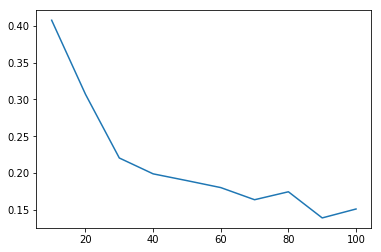

In [7]:
plt.plot(Ks,CH_scores)

**从图中可以看出, 类别数目越多, CH_score越小    
毕竟不同的事件, 最常出现的词干不同** 

In [8]:
# 设置超参数（聚类数目K）, 扩大搜索范围
Ks = range(3,16,3)
CH_scores = []

for K in Ks:
    ch = K_cluster_analysis(K=K, X_train=events_pca)
    CH_scores.append(ch)

K-means begin with clusters: 3
CH_score: 0.6550586331060769, time elaps: 13
K-means begin with clusters: 6
CH_score: 0.5201549398439561, time elaps: 12
K-means begin with clusters: 9
CH_score: 0.4186613843864797, time elaps: 12
K-means begin with clusters: 12
CH_score: 0.40073210078466215, time elaps: 12
K-means begin with clusters: 15
CH_score: 0.3605674418048711, time elaps: 12


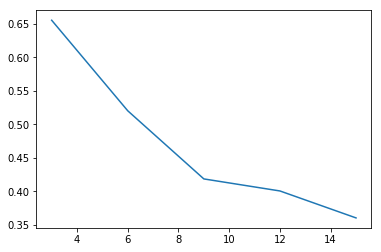

In [9]:
plt.plot(Ks,CH_scores)

**将分类类别扩大到150仍然是下降趋势**

In [10]:
K_cluster_analysis(K=300, X_train=events_pca)

K-means begin with clusters: 300
CH_score: 0.12990438707280672, time elaps: 20


0.12990438707280672

# 总结分析

**将分类类别扩大到300,CH_score= 0.11582691625710592    
而分类类别为150时, CH_score= 0.12862576653872518    
此时的CH_score相差并没有那么大了**

**相对应的n_clusters应该在150到200之间**